## 1-Import Library

In [1]:
import re
import pickle
import pandas as pd

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns


import jupyter_black

# Black Formatter
jupyter_black.load()

In [2]:
def html_to_text(html):
    soup = BeautifulSoup(html, "html.parser")
    return soup.get_text()


def remove_baca_juga(text_data):
    # Split the text into lines
    lines = text_data.split("\n")

    # Remove lines containing "Baca juga"
    cleaned_lines = [line for line in lines if "Baca juga" not in line]

    # Join the cleaned lines back into text
    cleaned_text = "\n".join(cleaned_lines)

    return cleaned_text

## 2-Data Loading

In [3]:
# File path
file_path = "../data/Kompas.pickle"

# Open the file in read mode
with open(file_path, "rb") as file:
    # Load the data from the pickle file
    data = pickle.load(file)

In [4]:
# List to store DataFrames
dfs = []

# Loop through each set of data
for d in data:
    # Convert data to DataFrame
    df = pd.DataFrame(d)
    # Append DataFrame to list
    dfs.append(df)

# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)
df

,Url,SiteID,SiteName,SectionID,SectionName,PublishedBy,SupTitle,Title,SubTitle,Description,...,SourceName,Video,EmbedSocial,Tag,Lipsus,Related,Keyword,Content,UrlShort,PublishedDate
0,http://regional.kompas.com/read/2024/01/01/000...,1,NEWS,2,Regional,Irfan Maullana,,"Malam Tahun Baru 2024, Jokowi Jajan Telur Gulu...",,Presiden Joko Widodo (Jokowi) jajan telur gulu...,...,None,[],[],"[Jokowi, Night Market Ngarsopuro, tahun baru 2...",[],[],,"<p><!--img.1--></p>\n<p><strong>SOLO, KOMPAS.c...",http://kmp.im/AGFmTo,2024-01-01 00:06:00
1,http://nasional.kompas.com/read/2024/01/01/001...,1,NEWS,1,Nasional,Irfan Maullana,,"Panglima TNI dan Kapolri Gelar Vicon, Pastikan...",,Agus juga memerintahkan kepada para pangdam da...,...,None,[],[],"[kapolri jenderal listyo sigit prabowo, tahun ...",[],[],,<p><strong><!--img.1--></strong></p>\n<p><stro...,http://kmp.im/AGFmTp,2024-01-01 00:16:14
2,http://megapolitan.kompas.com/read/2024/01/01/...,1,NEWS,10,Megapolitan,Irfan Maullana,,"Sapa Warga di Monas Jelang Tahun Baru 2024, He...",,Penjabat (Pj) Gubernur DKI Jakarta Heru Budi H...,...,None,[],[],"[Heru Budi, tahun baru 2024]",[],[],,<p><strong><!--img.1--></strong></p>\n<p><stro...,http://kmp.im/AGFmTr,2024-01-01 00:26:27
3,http://regional.kompas.com/read/2024/01/01/004...,1,NEWS,2,Regional,Irfan Maullana,,"Gempa Sumedang, 53 Rumah Rusak dan 3 Korban Lu...",,"Sedikitnya 53 rumah rusak, dan tiga korban luk...",...,None,[],[],"[gempa sumedang, analisis gempa Sumedang]",[],[],,"<p><!--img.1--></p>\n<p><strong>SUMEDANG, KOMP...",http://kmp.im/AGFmTs,2024-01-01 00:43:27
4,http://megapolitan.kompas.com/read/2024/01/01/...,1,NEWS,10,Megapolitan,Irfan Maullana,,Sorak-sorai Lengkapi Kemeriahan Pesta Kembang ...,,Mereka berteriak girang karena kembang api yan...,...,None,[],[],"[Ancol, tahun baru 2024]",[],[],,<p><strong><!--img.1--></strong></p>\n<p><stro...,http://kmp.im/AGFmTt,2024-01-01 00:49:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24856,http://surabaya.kompas.com/read/2024/01/31/233...,78,REGIONAL,764,Surabaya,Aloysius Gonsaga AE,,Terdakwa Kebakaran Bromo Divonis 2 Tahun 6 Bul...,,"AWEW, pria terdakwa kasus kebakaran padang sab...",...,None,[],[],"[Kebakaran Bromo, kerugian akibat kebakaran br...",[],[{'urlpath': 'http://surabaya.kompas.com/read/...,bromo probolinggo kebakaran bromo kasus kebaka...,<p><!--img.1--><strong>KOMPAS.com</strong> - A...,http://kmp.im/AGFula,2024-01-31 23:37:14
24857,http://surabaya.kompas.com/read/2024/01/31/234...,78,REGIONAL,764,Surabaya,Aloysius Gonsaga AE,,Anies Puji Mahfud MD yang Mundur dari Menkopol...,,Capres nomor urut 1 Anies Baswedan puji cawapr...,...,None,[],[],"[anies-muhaimin, Ganjar-Mahfud, mahfud md mund...","[{'name': 'Menuju Pemilu 2024', 'id': '7106'},...",[{'urlpath': 'http://surabaya.kompas.com/read/...,anies baswedan madura mahfud md kampanye pilpres,<p><strong><!--img.1-->KOMPAS.com</strong> - C...,http://kmp.im/AGFulb,2024-01-31 23:42:59
24858,http://megapolitan.kompas.com/read/2024/01/31/...,1,NEWS,10,Megapolitan,Abdul Haris Maulana,,Heru Budi Pastikan Sembako Murah Cukup untuk M...,,Pemprov DKI mengupayakan dan memastikan pasoka...,...,None,[],[],"[sembako murah, pemerintah provinsi dki jakart...",[],[],,"<p><strong><!--img.1-->JAKARTA, KOMPAS.com -</...",http://kmp.im/AGFulc,2024-01-31 23:44:16
24859,http://surabaya.kompas.com/read/2024/01/31/234...,78,REGIONAL,764,Surabaya,Aloysius Gonsaga AE,,Safari Kampanye Paslon Amin di Madura Ditutup ...,,"Capres-cawapres nomor urut 1, Anies-Muhaimin, ...",...,None,[],[],"[anies-muhaimin, Kampanye Anies-Muhaimin di Su...","[{'name': 'Menuju Pemilu 2024', 'id': '7106'},...",[{'urlpath': 'http://regional.kompas.com/read/...,anies-muhaimin madura kampanye anies kampanye ...,<p><strong><!--img.1-->KOMPAS.com</strong> - P...,http://kmp.im/AGFulf,2024-01-31 23:49:45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24861 entries, 0 to 24860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Url            24861 non-null  object
 1   SiteID         24861 non-null  object
 2   SiteName       24861 non-null  object
 3   SectionID      24861 non-null  object
 4   SectionName    24861 non-null  object
 5   PublishedBy    24861 non-null  object
 6   SupTitle       24861 non-null  object
 7   Title          24861 non-null  object
 8   SubTitle       24859 non-null  object
 9   Description    24861 non-null  object
 10  AuthorName     22776 non-null  object
 11  AuthorID       22776 non-null  object
 12  Photo          24861 non-null  object
 13  SourceName     4561 non-null   object
 14  Video          24861 non-null  object
 15  EmbedSocial    24861 non-null  object
 16  Tag            24833 non-null  object
 17  Lipsus         24861 non-null  object
 18  Related        24861 non-n

In [6]:
df["date"] = pd.to_datetime(df["PublishedDate"]).dt.date

## 3-Exploratory Data Analysis (EDA)

### Author Analysis

1. Total Authors

In [7]:
print("Total number of authors are:", df["AuthorName"].nunique())

Total number of authors are: 445


Now if we want to see which of the Site Name have the most number of authors, the first place is Regional site and followed by News, Money, Travel, etc.

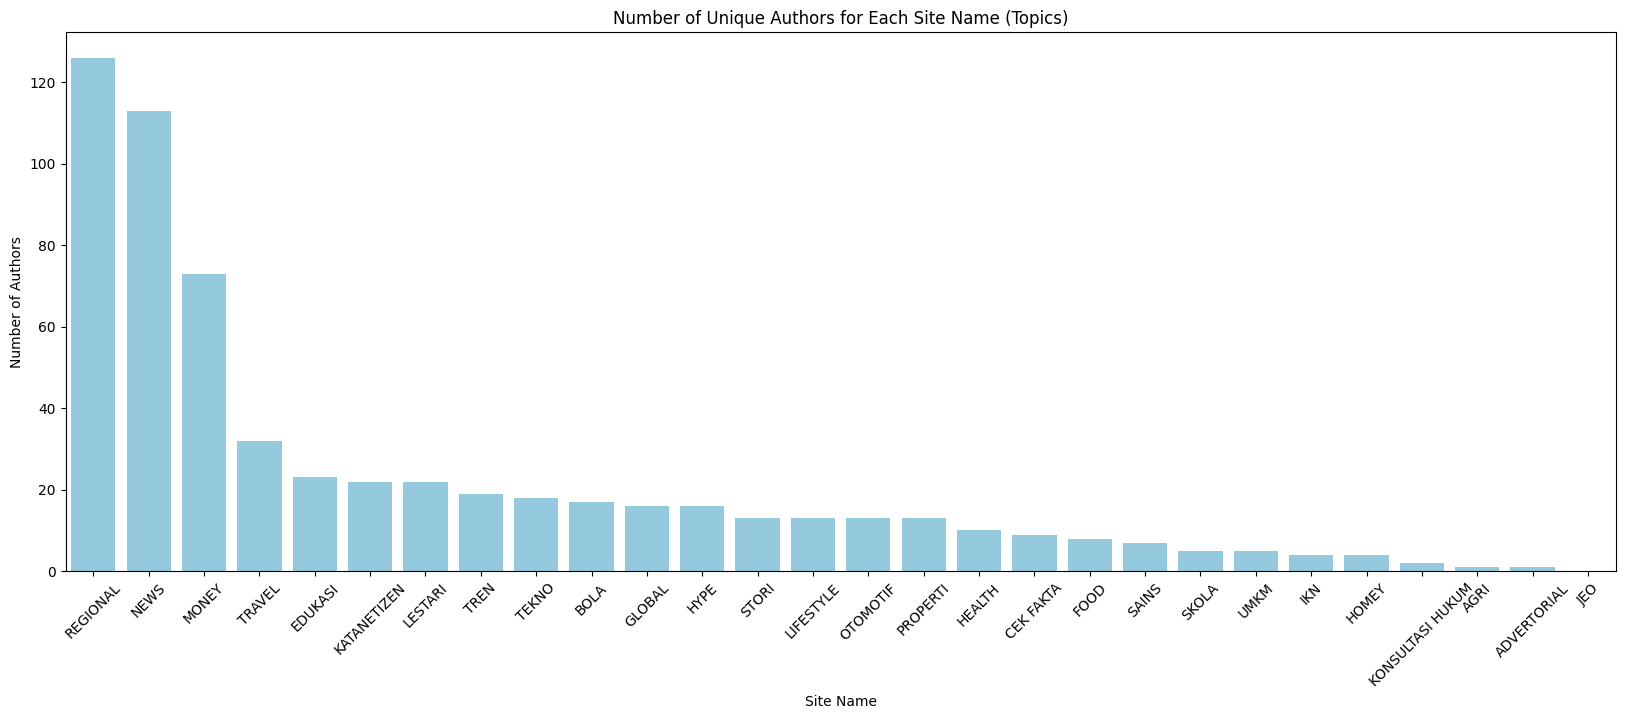

In [8]:
plt.figure(figsize=(20, 7))
site_author_counts = (
    df.groupby("SiteName")["AuthorName"].nunique().sort_values(ascending=False)
)
sns.barplot(x=site_author_counts.index, y=site_author_counts.values, color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Site Name")
plt.ylabel("Number of Authors")
plt.title("Number of Unique Authors for Each Site Name (Topics)")
plt.show()

2. The Most Active Authors?

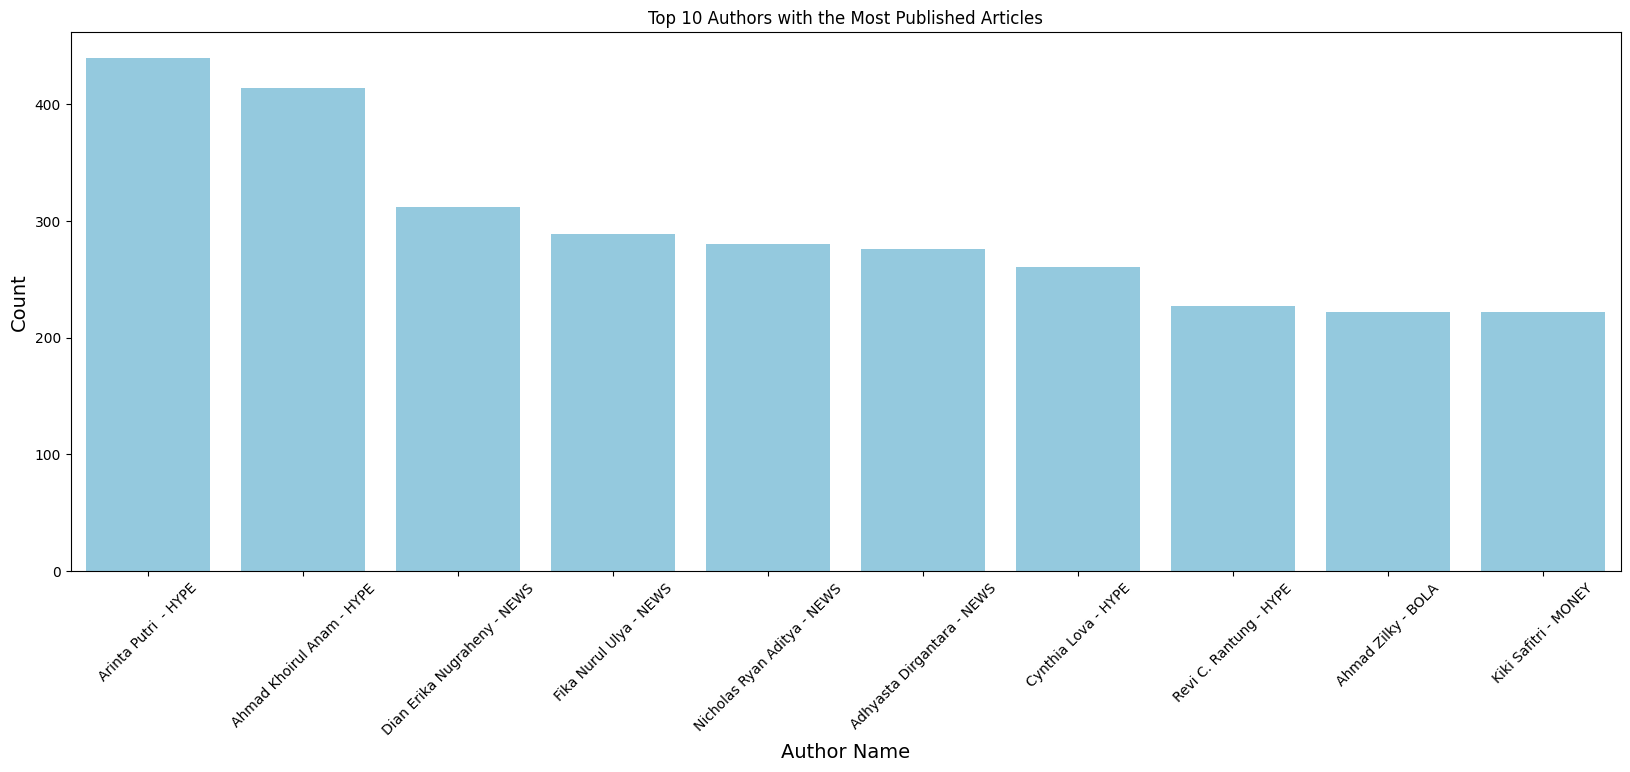

In [9]:
plt.figure(figsize=(20, 7))
# Create a new column with the combined values of AuthorName and SiteName
df["AuthorSite"] = df["AuthorName"] + " - " + df["SiteName"]
sns.countplot(
    data=df,
    x="AuthorSite",
    color="skyblue",
    order=df["AuthorSite"].value_counts().head(10).index,
)
plt.title("Top 10 Authors with the Most Published Articles")
plt.xlabel("Author Name", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

It can be seen that, the most active authors mainly either from HYPE or NEWS SiteName or Topics then followed by BOLA and MONEY.

In [25]:
print("10 Active Authors with the Most Articles published:")
df["AuthorSite"].value_counts().head(10)

10 Active Authors with the Most Articles published:


AuthorSite
Arinta Putri  - HYPE           440
Ahmad Khoirul Anam - HYPE      414
Dian Erika Nugraheny - NEWS    312
Fika Nurul Ulya - NEWS         289
Nicholas Ryan Aditya - NEWS    280
Adhyasta Dirgantara - NEWS     276
Cynthia Lova - HYPE            261
Revi C. Rantung - HYPE         227
Ahmad Zilky - BOLA             222
Kiki Safitri - MONEY           222
Name: count, dtype: int64

### Article Characteristics

1. Article published date range?

In [10]:
print(df["date"].min(), "s/d", df["date"].max())

2024-01-01 s/d 2024-01-31


article from the dataset provided is from the month of january of 2024, 1st January 2024 to 31st January 2024.

2. What are the distribution of article lenght?

- Distribution of the content lenght based on the number of characters 

In [11]:
# Transform html to text and remove ads marked by "Baca juga:"
df["Content"] = df["Content"].apply(html_to_text)
df["Content"] = df["Content"].apply(remove_baca_juga)

# Counting length of the article
df["LengthContent"] = [len(text) for text in df["Content"]]
df["WordCount"] = [len(text.split()) for text in df["Content"]]

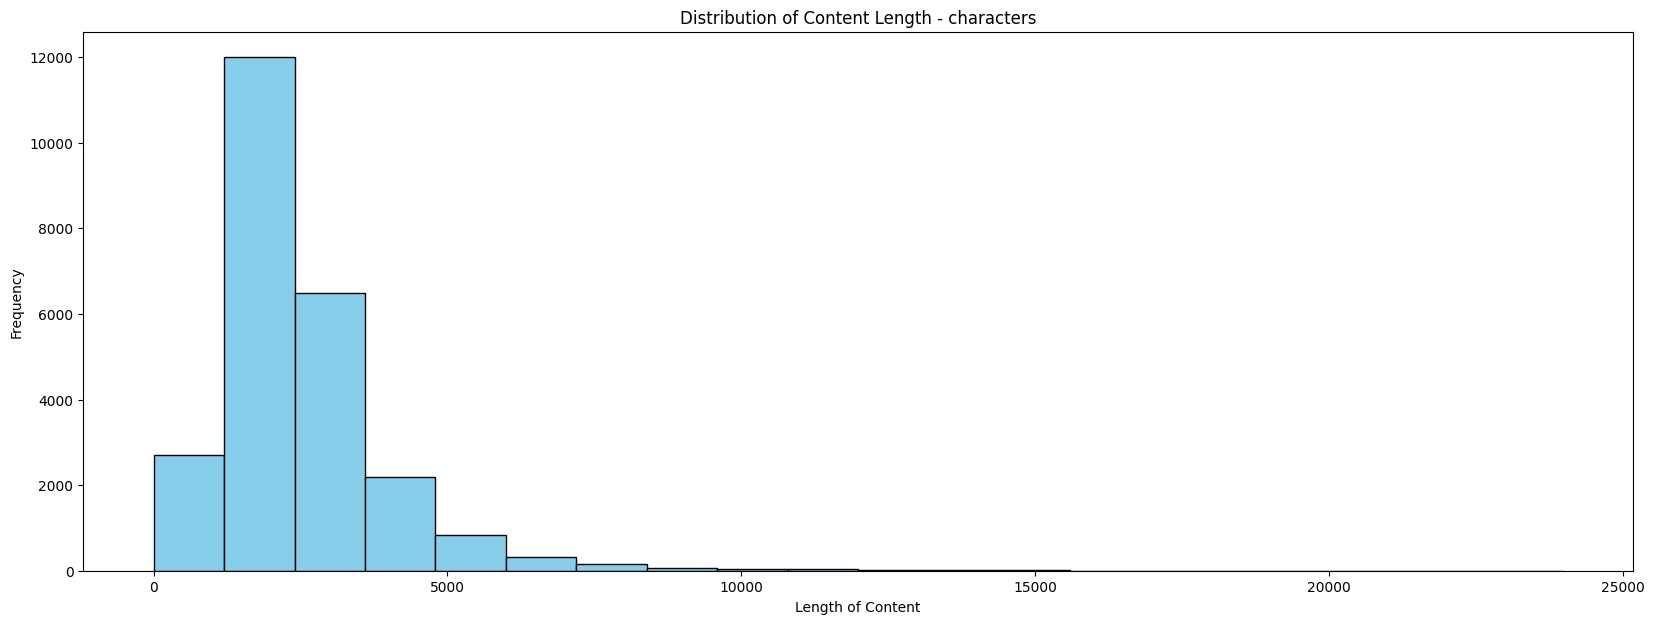

In [12]:
plt.figure(figsize=(20, 7))
plt.hist(df["LengthContent"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Length of Content")
plt.ylabel("Frequency")
plt.title("Distribution of Content Length - characters")
plt.show()

- Distirbution of the content lenght based on the total number of words in the content

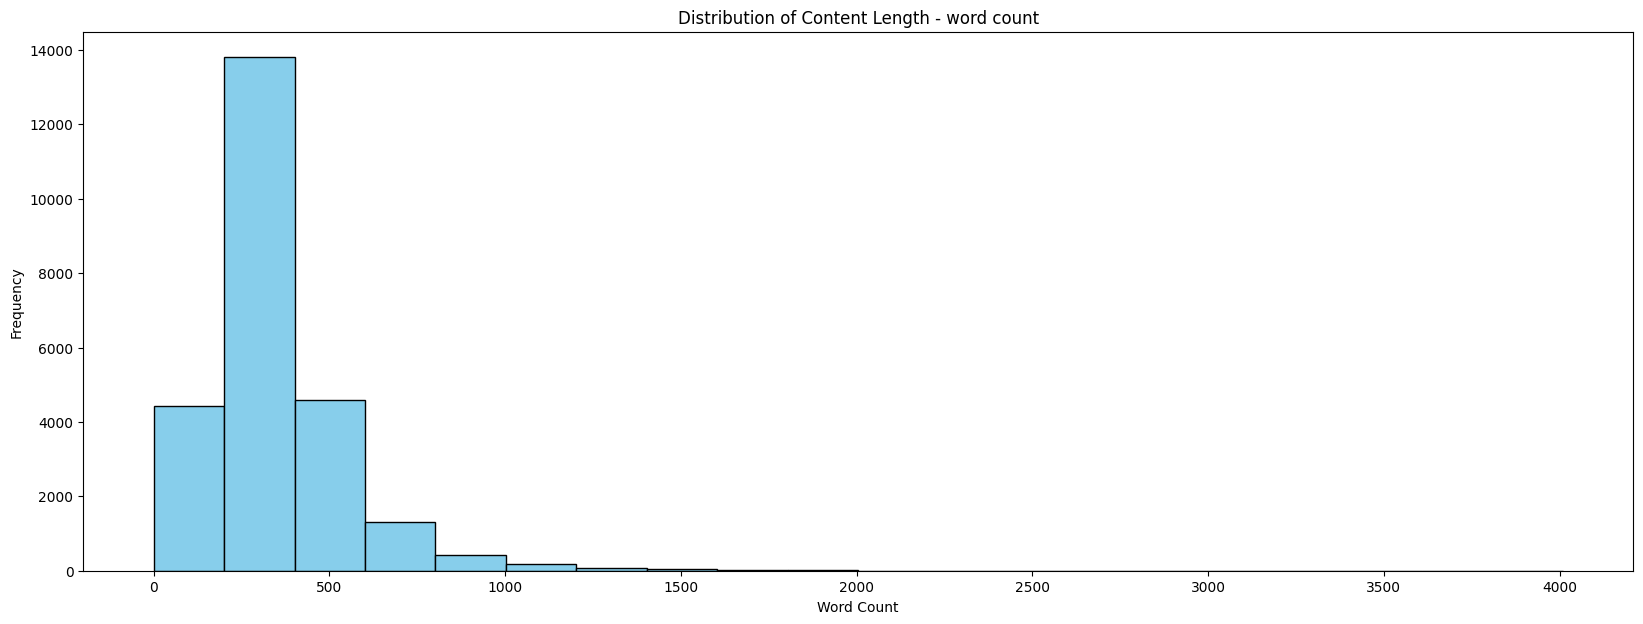

In [13]:
plt.figure(figsize=(20, 7))
plt.hist(df["WordCount"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Content Length - word count")
plt.show()

In [14]:
df["LengthContent"].describe()

count    24861.000000
mean      2460.014038
std       1462.979283
min          0.000000
25%       1604.000000
50%       2153.000000
75%       2965.000000
max      23980.000000
Name: LengthContent, dtype: float64

From the distribution graphs above, we can see that the content lenght distribution has a positive skew (has a long tail on the its right side). This indicates that there are some contents with high/extreme lenght content (a lot of characters in the content). On average, the lenght of the content published is at around ± 2460 characters. 

3. Are there any outliers in terms of article length?

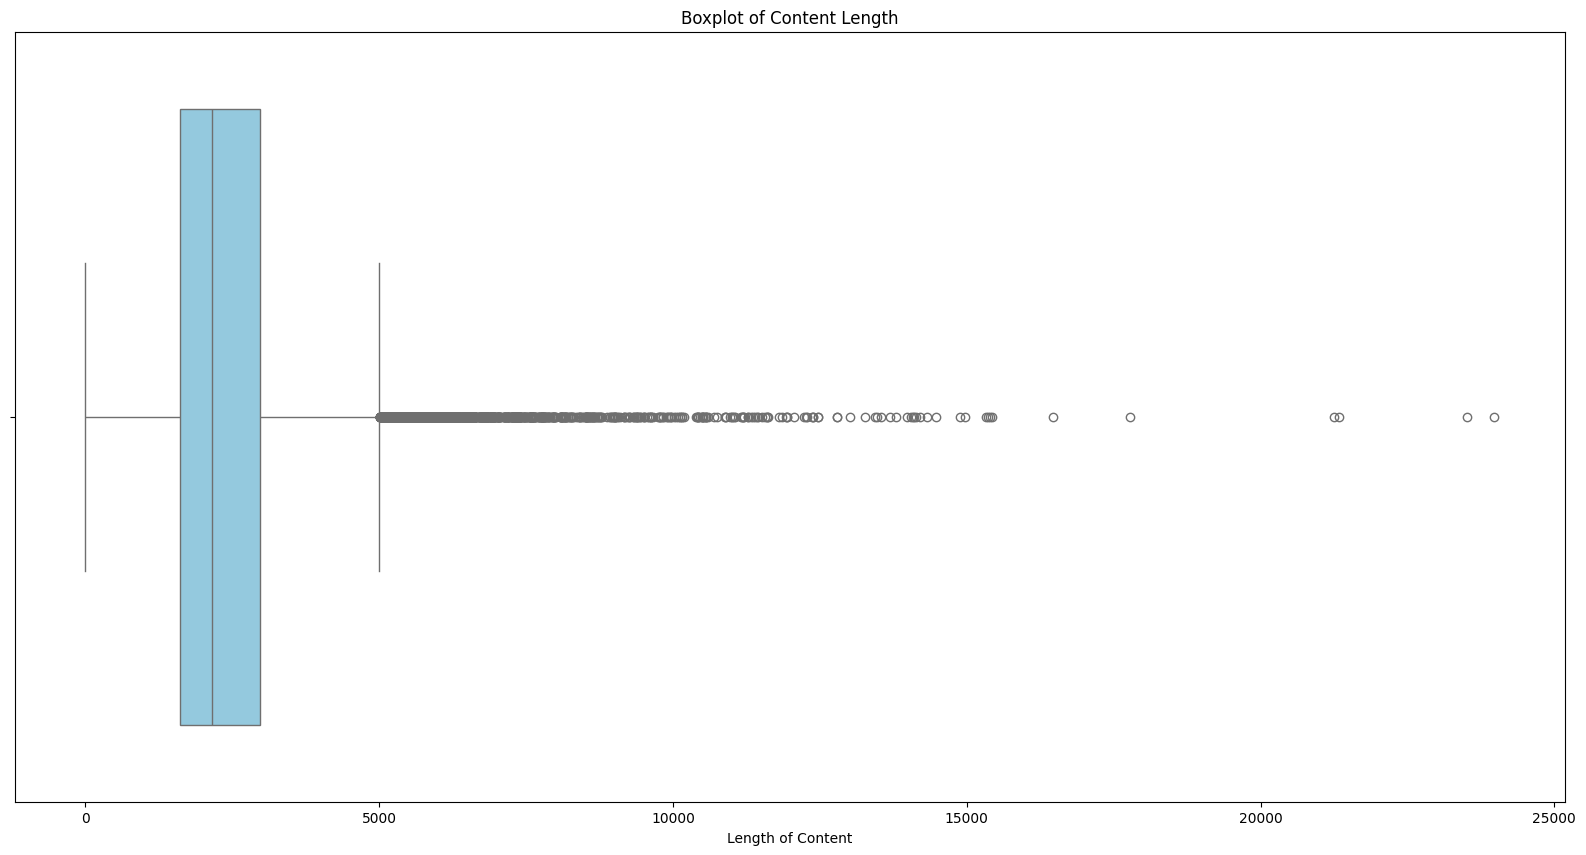

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x="LengthContent", color="skyblue")
plt.xlabel("Length of Content")
plt.title("Boxplot of Content Length")
plt.show()

Using Boxplots as shown above, we can see that there are outliers on the upper bound or above the Q3. Approximately, content length above ± 5000 is considered as outliers.

In [17]:
df[df["LengthContent"] >= 5000].sort_values(ascending=False, by="LengthContent")

,Url,SiteID,SiteName,SectionID,SectionName,PublishedBy,SupTitle,Title,SubTitle,Description,...,Lipsus,Related,Keyword,Content,UrlShort,PublishedDate,date,AuthorSite,LengthContent,WordCount
7087,http://www.kompas.com/tren/read/2024/01/10/113...,65,TREN,704,Tren,Ahmad Naufal Dzulfaroh,,Rincian Lengkap 28 Simpul Kesejahteraan Anies-...,,"Diketahui, 28 Simpul Kesejahteraan Anies-Muhai...",...,"[{'name': 'Anies - Muhaimin', 'id': '8494'}]",[{'urlpath': 'http://www.kompas.com/tren/read/...,Anies-Muhaimin Indonesia Rincian Lengkap 28 Si...,KOMPAS.com - Pasangan calon presiden (capres) ...,http://kmp.im/AGFocP,2024-01-10 11:30:00,2024-01-10,Aditya Priyatna Darmawan - TREN,23980,3138
12540,http://www.kompas.com/hype/read/2024/01/16/233...,66,HYPE,715,Musik,Andika Aditia,,Daftar Lengkap Nominasi Grammy Awards 2024,,Para pemenang akan diumumkan pada upacara Gram...,...,[],[],,KOMPAS.com - Daftar lengkap nominasi Grammy Aw...,http://kmp.im/AGFq9O,2024-01-16 23:30:09,2024-01-16,Andika Aditia - HYPE,23519,4009
5587,http://nasional.kompas.com/read/2024/01/08/180...,1,NEWS,1,Nasional,Sandro Gatra,kolom,Moderasi Beragama di Perguruan Tinggi,,Moderasi beragama merupakan solusi atas hadirn...,...,[],[],,INDONESIA Negara majemuk. Berbagai aspek kemaj...,http://kmp.im/AGFoKn,2024-01-08 18:09:26,2024-01-08,"Prof Dr H Syarif, S.Ag., MA - NEWS",21342,2763
13126,http://www.kompas.com/global/read/2024/01/17/1...,70,GLOBAL,729,Global,Aditya Jaya Iswara,,"Sidang Genosida Israel, Kenapa Indonesia Tak I...",,Indonesia secara hukum tidak bisa menggugat ka...,...,[],[{'urlpath': 'http://www.kompas.com/global/rea...,Tal Becker Den Haag Afrika Selatan Sidang geno...,"DEN HAAG, KOMPAS.com - Mahkamah Internasional ...",http://kmp.im/AGFqlZ,2024-01-17 16:03:22,2024-01-17,BBC News Indonesia - GLOBAL,21245,2724
23163,http://regional.kompas.com/read/2024/01/30/101...,78,REGIONAL,763,Regional,Rachmawati,,Saat Caleg Minta Bantuan Dukun Politik dan Gur...,,Di tahun politik seperti sekarang tak cuma ora...,...,[],[{'urlpath': 'http://regional.kompas.com/read/...,,KOMPAS.com - Pemilu 2024 yang digelar pada 14 ...,http://kmp.im/AGFuKm,2024-01-30 10:11:00,2024-01-30,NaN,17770,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,http://money.kompas.com/read/2024/01/15/074300...,26,MONEY,565,Whats New,Sakina Rakhma Diah Setiawan,,"Jawaban Anies, Prabowo, dan Ganjar Ketika Dita...",,Tax ratio Indonesia bergerak stagnan dan sudah...,...,[],[{'urlpath': 'http://money.kompas.com/read/202...,Capres Jakarta Tax ratio Liputan,"\nJAKARTA, KOMPAS.com - Pelaku usaha yang terg...",http://kmp.im/AGFpwB,2024-01-15 07:43:00,2024-01-15,Rully R. Ramli - MONEY,5002,666
14686,http://www.kompas.com/tren/read/2024/01/19/110...,65,TREN,704,Tren,Rizal Setyo Nugroho,,BCA Naikkan Biaya Admin Tahapan Xpresi dan Lim...,,BCA menaikkan biaya admin bulanan dan limit tr...,...,[],[{'urlpath': 'http://www.kompas.com/tren/read/...,Hera F Haryn Indonesia Limit transaksi dan bia...,\nKOMPAS.com - PT Bank Central Asia (BCA) mena...,http://kmp.im/AGFr03,2024-01-19 11:00:00,2024-01-19,Yefta Christopherus Asia Sanjaya - TREN,5002,800
6295,http://tekno.kompas.com/read/2024/01/09/143000...,7,TEKNO,468,e-Business,Zulfikar Hardiansyah,,"Cara Menyembunyikan Chat WhatsApp Tanpa Arsip,...",,Pengguna bisa menyembunyikan chat WA tanpa ars...,...,[],[{'urlpath': 'http://tekno.kompas.com/read/202...,,"\nKOMPAS.com - WhatsApp atau biasa disebut WA,...",http://tekno.kompas.com/read/2024/01/09/143000...,2024-01-09 14:30:00,2024-01-09,Zulfikar Hardiansyah - TEKNO,5002,699
10076,http://www.kompas.com/tren/read/2024/01/13/190...,65,TREN,704,Tren,Mahardini Nur Afifah,,Kemenag Buka Pendaftaran Petugas Haji 2024 Tin...,,Kemenag membuka pendaftaran petugas haji atau ...,...,[],[{'urlpath': 'http://www.kompas.com/tren/read/...,Anna Hasbie Indonesia Kemenag Buka Seleksi PPI...,KOMPAS.com - Kementerian Agama (Kemenag) membu...,http://www.kompas.com/tren/read/2024/01/13/190...,2024-01-13 19:

Also, it is important to note that, there are 158 rows with 0 content length value (Content is null).

In [18]:
df[df["LengthContent"] == 0]

,Url,SiteID,SiteName,SectionID,SectionName,PublishedBy,SupTitle,Title,SubTitle,Description,...,Lipsus,Related,Keyword,Content,UrlShort,PublishedDate,date,AuthorSite,LengthContent,WordCount
139,http://www.kompas.com/hype/read/2024/01/01/110...,66,HYPE,797,K-Wave,Dian Maharani,,Ungkapan Duka Artis-artis Korea untuk Lee Sun ...,,Beberapa di antaranya menyebut nama Lee Sun Ky...,...,[],[],,,http://kmp.im/AGFmW6,2024-01-01 11:05:19,2024-01-01,Melvina Tionardus - HYPE,0,0
451,http://medan.kompas.com/read/2024/01/01/215359...,78,REGIONAL,765,Medan,Khairina,,Viral Video Pemotor di Deli Serdang Tewas Tert...,,"Korban tiba-tiba memajukan sepeda motornya, hi...",...,[],[{'urlpath': 'http://medan.kompas.com/read/202...,pemuda Medan pemuda terobos palang kereta api,,http://kmp.im/AGFm2k,2024-01-01 21:53:59,2024-01-01,Rahmat Utomo - REGIONAL,0,0
486,http://nasional.kompas.com/read/2024/01/02/053...,1,NEWS,1,Nasional,Ihsanuddin,,Ganjar Klaim Bunga KUR 7 Persen Berawal dari J...,,Ganjar mengklaim bunga KUR 7 persen untuk UMKM...,...,"[{'name': 'Menuju Pemilu 2024', 'id': '7106'},...",[],,,http://kmp.im/AGFm4C,2024-01-02 05:39:47,2024-01-02,Fika Nurul Ulya - NEWS,0,0
529,http://megapolitan.kompas.com/read/2024/01/02/...,1,NEWS,10,Megapolitan,Ihsanuddin,,Dinas LH DKI Angkut 130 Ton Sampah dari Peraya...,,Dinas Lingkungan Hidup (LH) DKI Jakarta mengan...,...,[],[],,,http://kmp.im/AGFm4p,2024-01-02 07:10:46,2024-01-02,Muhammad Isa Bustomi - NEWS,0,0
537,http://nasional.kompas.com/read/2024/01/02/072...,1,NEWS,1,Nasional,Ihsanuddin,,Ketua KPK Definitif Bakal Dipilih DPR Setelah ...,,DPR bakal memilih satu dari 5 nama pimpinan KP...,...,[{'name': 'Firli Bahuri Tersangka Kasus Dugaan...,[],,,http://kmp.im/AGFm4x,2024-01-02 07:29:48,2024-01-02,Irfan Kamil - NEWS,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24713,http://nasional.kompas.com/read/2024/01/31/195...,1,NEWS,1,Nasional,Ihsanuddin,,KPU: Debat Capres Kelima Diselenggarakan di JC...,,Debat pilpres pamungkas bakal kembali diadakan...,...,"[{'name': 'Menuju Pemilu 2024', 'id': '7106'}]",[],,,http://kmp.im/AGFui5,2024-01-31 19:52:08,2024-01-31,Fika Nurul Ulya - NEWS,0,0
24781,http://nasional.kompas.com/read/2024/01/31/210...,1,NEWS,1,Nasional,Ihsanuddin,,"Anies Tanya Apakah Mau Lanjutkan Kesulitan, Wa...",,"""Harga beras murah atau mahal? Lapangan pekerj...",...,"[{'name': 'Menuju Pemilu 2024', 'id': '7106'},...",[],,,http://kmp.im/AGFujk,2024-01-31 21:08:59,2024-01-31,Irfan Kamil - NEWS,0,0
24805,http://nasional.kompas.com/read/2024/01/31/213...,1,NEWS,1,Nasional,Ihsanuddin,,"Sandiaga Sebut Mahfud Akan Temui Jokowi Besok,...",,"Sandiaga menyebut, Mahfud MD akan bertemu deng...",...,"[{'name': 'Ganjar - Mahfud', 'id': '8635'}, {'...",[],,,http://kmp.im/AGFukX,2024-01-31 21:39:34,2024-01-31,Dian Erika Nugraheny - NEWS,0,0
24809,http://nasional.kompas.com/read/2024/01/31/215...,1,NEWS,1,Nasional,Ihsanuddin,,KPU Kaji Penambahan Closing Statement Debat Ca...,,KPU mengkaji penambahan waktu closing statemen...,...,"[{'name': 'Menuju Pemilu 2024', 'id': '7106'}]",[],,,http://kmp.im/AGFuk3,2024-01-31 21:52:01,2024-01-31,Fika Nurul Ulya - NEWS,0,0


4. Are the articles published on each site name have an equal total number of articles?

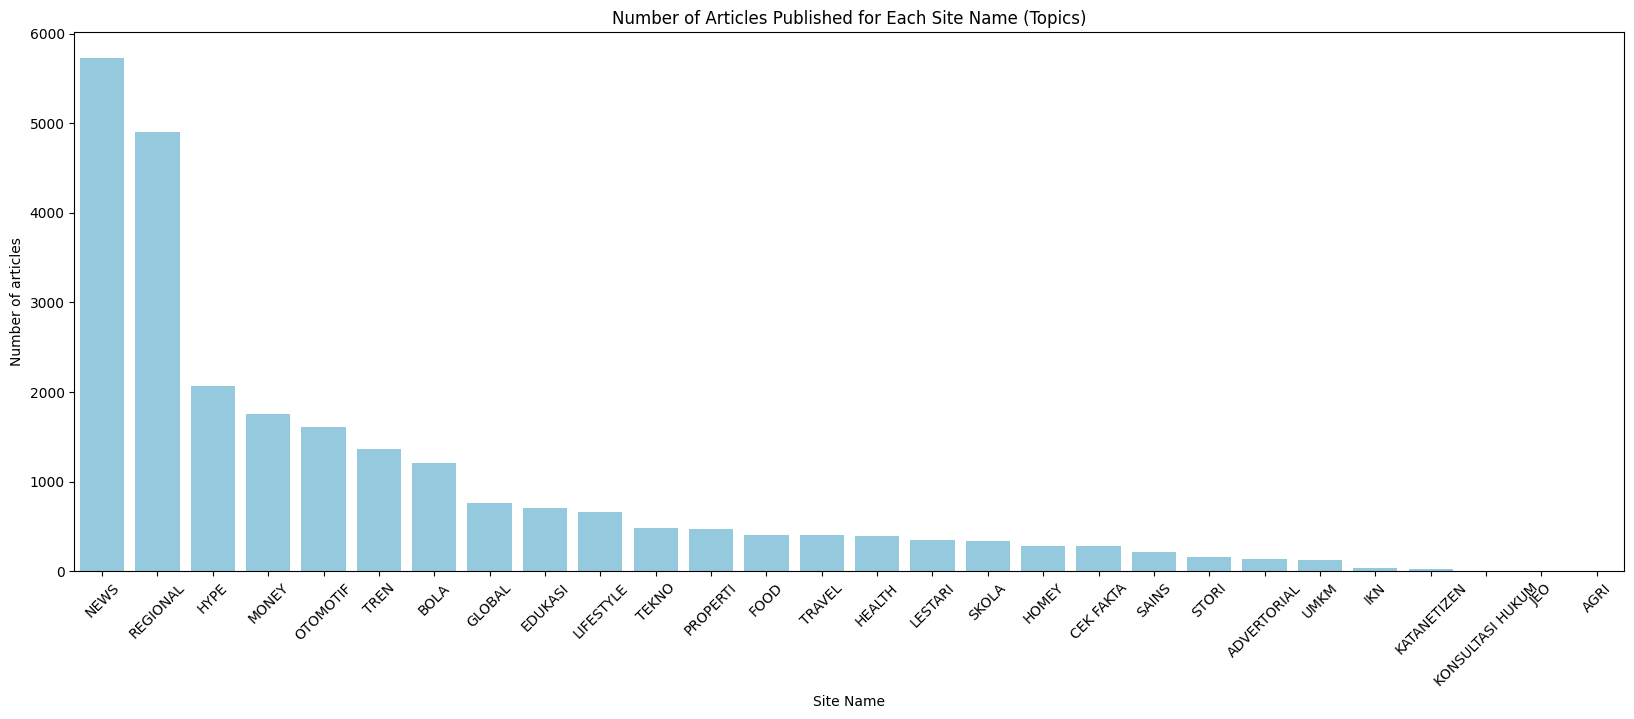

In [29]:
plt.figure(figsize=(20, 7))
site_author_counts = (
    df.groupby("SiteName")["Content"].count().sort_values(ascending=False)
)
sns.barplot(x=site_author_counts.index, y=site_author_counts.values, color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Site Name")
plt.ylabel("Number of articles")
plt.title("Number of Articles Published for Each Site Name (Topics)")
plt.show()

From the given graph, we can see that The distribution of articles published in the month January 2024 is quite diverse, with a significant number in categories like "News" and "Regional" with > 4000 articles published. This indicate that both of the Site Name is probably has more authors and may be has more audients interest. On the other hand, categories like "Agri," "JEO,", "Konsultasi Hukum", and "KATANETIZEN" have very few articles, indicating either Kompas.com have less focus on these topics or perhaps they are relatively new additions or may be they have a small number of authors.
 
Also, it is important to note that, some Site Name may vary from month-to-month. So, there are possibilities that other Site Name may have more articles published in different month.

### Publication Trends

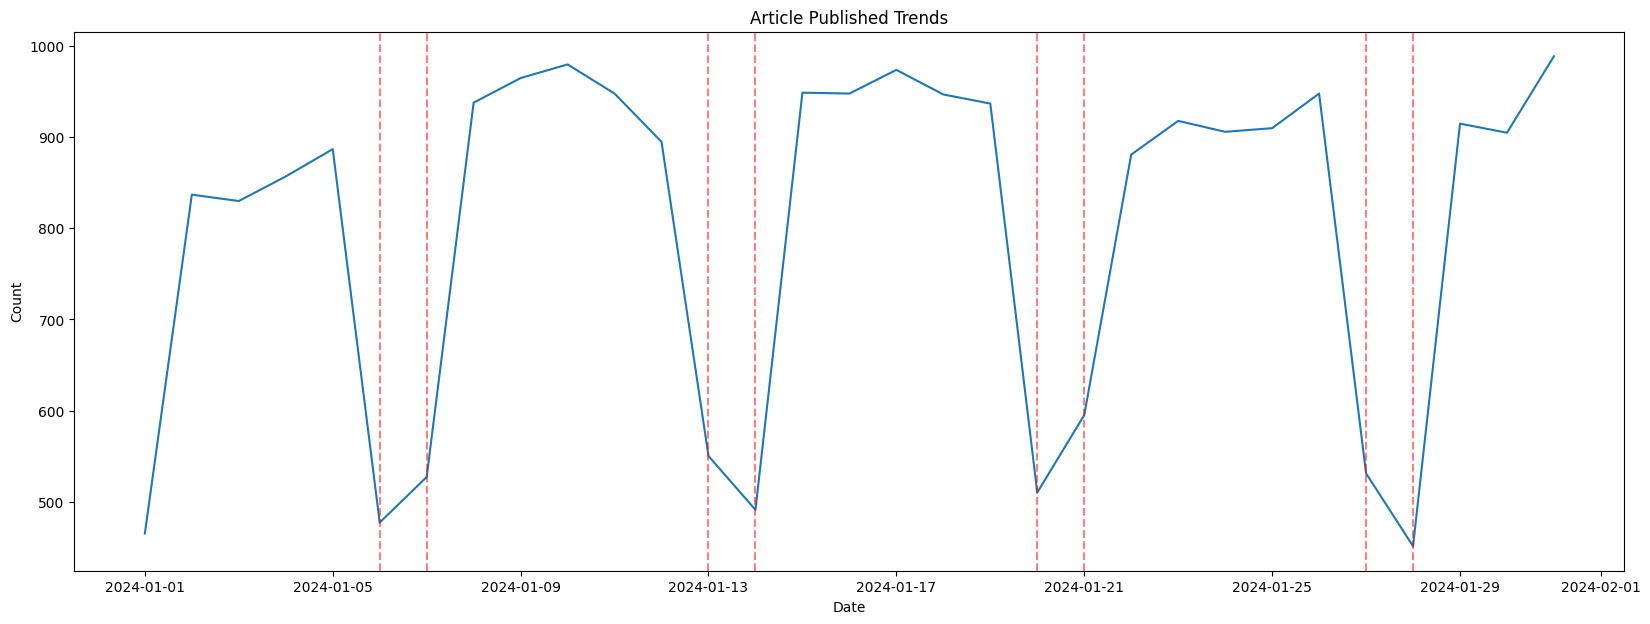

In [19]:
# Data
df["date"] = pd.to_datetime(df["date"])
# Extract the day name from the 'date' column
df["day_name"] = df["date"].dt.day_name()

# Plot
plt.figure(figsize=(20, 7))
sns.lineplot(
    # data=df,
    x=df.groupby("date")["Content"].count().index,
    y=df.groupby("date")["Content"].count().values,
)
# Add vertical lines for weekends
weekend_dates = df[df["day_name"].isin(["Saturday", "Sunday"])]["date"].unique()
for weekend_date in weekend_dates:
    plt.axvline(weekend_date, color="red", linestyle="--", alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Article Published Trends")

plt.show()
plt.show()

** Dashed red lines on the chart indicate weekends (Saturday and Sunday)

Overall, the trend shows fluctuantions in the number of article published throughout the weeks in January 2024. There may be peaks and drops each day with Saturday and Sunday consistently showing lower counts. However it is save to say that Kompas.com generally maintaning high article publication each day in January 2024.